<a href="https://colab.research.google.com/github/Voland24/AndrewNGDeepLearningCourse/blob/main/Week2Optimization_methodsipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Helper methods provided by the course

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy.io
import sklearn
import sklearn.datasets

def sigmoid(x):
    """
    Compute the sigmoid of x
    Arguments:
    x -- A scalar or numpy array of any size.
    Return:
    s -- sigmoid(x)
    """
    s = 1/(1+np.exp(-x))
    return s

def relu(x):
    """
    Compute the relu of x
    Arguments:
    x -- A scalar or numpy array of any size.
    Return:
    s -- relu(x)
    """
    s = np.maximum(0,x)
    
    return s

def load_params_and_grads(seed=1):
    np.random.seed(seed)
    W1 = np.random.randn(2,3)
    b1 = np.random.randn(2,1)
    W2 = np.random.randn(3,3)
    b2 = np.random.randn(3,1)

    dW1 = np.random.randn(2,3)
    db1 = np.random.randn(2,1)
    dW2 = np.random.randn(3,3)
    db2 = np.random.randn(3,1)
    
    return W1, b1, W2, b2, dW1, db1, dW2, db2


def initialize_parameters(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    b1 -- bias vector of shape (layer_dims[l], 1)
                    Wl -- weight matrix of shape (layer_dims[l-1], layer_dims[l])
                    bl -- bias vector of shape (1, layer_dims[l])
                    
    Tips:
    - For example: the layer_dims for the "Planar Data classification model" would have been [2,2,1]. 
    This means W1's shape was (2,2), b1 was (1,2), W2 was (2,1) and b2 was (1,1). Now you have to generalize it!
    - In the for loop, use parameters['W' + str(l)] to access Wl, where l is the iterative integer.
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims) # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])*  np.sqrt(2 / layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == layer_dims[l], layer_dims[l-1])
        assert(parameters['W' + str(l)].shape == layer_dims[l], 1)
        
    return parameters


def compute_cost(a3, Y):
    
    """
    Implement the cost function
    
    Arguments:
    a3 -- post-activation, output of forward propagation
    Y -- "true" labels vector, same shape as a3
    
    Returns:
    cost - value of the cost function
    """
    m = Y.shape[1]
    
    logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
    cost = 1./m * np.sum(logprobs)
    
    return cost

def forward_propagation(X, parameters):
    """
    Implements the forward propagation (and computes the loss) presented in Figure 2.
    
    Arguments:
    X -- input dataset, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3":
                    W1 -- weight matrix of shape ()
                    b1 -- bias vector of shape ()
                    W2 -- weight matrix of shape ()
                    b2 -- bias vector of shape ()
                    W3 -- weight matrix of shape ()
                    b3 -- bias vector of shape ()
    
    Returns:
    loss -- the loss function (vanilla logistic loss)
    """
    
    # retrieve parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    z1 = np.dot(W1, X) + b1
    a1 = relu(z1)
    z2 = np.dot(W2, a1) + b2
    a2 = relu(z2)
    z3 = np.dot(W3, a2) + b3
    a3 = sigmoid(z3)
    
    cache = (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3)
    
    return a3, cache

def backward_propagation(X, Y, cache):
    """
    Implement the backward propagation presented in figure 2.
    
    Arguments:
    X -- input dataset, of shape (input size, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat)
    cache -- cache output from forward_propagation()
    
    Returns:
    gradients -- A dictionary with the gradients with respect to each parameter, activation and pre-activation variables
    """
    m = X.shape[1]
    (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3) = cache
    
    dz3 = 1./m * (a3 - Y)
    dW3 = np.dot(dz3, a2.T)
    db3 = np.sum(dz3, axis=1, keepdims = True)
    
    da2 = np.dot(W3.T, dz3)
    dz2 = np.multiply(da2, np.int64(a2 > 0))
    dW2 = np.dot(dz2, a1.T)
    db2 = np.sum(dz2, axis=1, keepdims = True)
    
    da1 = np.dot(W2.T, dz2)
    dz1 = np.multiply(da1, np.int64(a1 > 0))
    dW1 = np.dot(dz1, X.T)
    db1 = np.sum(dz1, axis=1, keepdims = True)
    
    gradients = {"dz3": dz3, "dW3": dW3, "db3": db3,
                 "da2": da2, "dz2": dz2, "dW2": dW2, "db2": db2,
                 "da1": da1, "dz1": dz1, "dW1": dW1, "db1": db1}
    
    return gradients

def predict(X, y, parameters):
    """
    This function is used to predict the results of a  n-layer neural network.
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[1]
    p = np.zeros((1,m), dtype = np.int)
    
    # Forward propagation
    a3, caches = forward_propagation(X, parameters)
    
    # convert probas to 0/1 predictions
    for i in range(0, a3.shape[1]):
        if a3[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0

    # print results

    #print ("predictions: " + str(p[0,:]))
    #print ("true labels: " + str(y[0,:]))
    print("Accuracy: "  + str(np.mean((p[0,:] == y[0,:]))))
    
    return p

def load_2D_dataset():
    data = scipy.io.loadmat('datasets/data.mat')
    train_X = data['X'].T
    train_Y = data['y'].T
    test_X = data['Xval'].T
    test_Y = data['yval'].T

    plt.scatter(train_X[0, :], train_X[1, :], c=train_Y, s=40, cmap=plt.cm.Spectral);
    
    return train_X, train_Y, test_X, test_Y

def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y.ravel(), cmap=plt.cm.Spectral)
    plt.show()
    
def predict_dec(parameters, X):
    """
    Used for plotting decision boundary.
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (m, K)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Predict using forward propagation and a classification threshold of 0.5
    a3, cache = forward_propagation(X, parameters)
    predictions = (a3 > 0.5)
    return predictions

def load_dataset():
    np.random.seed(3)
    train_X, train_Y = sklearn.datasets.make_moons(n_samples=300, noise=.2) #300 #0.2 
    # Visualize the data
    plt.scatter(train_X[:, 0], train_X[:, 1], c=train_Y, s=40, cmap=plt.cm.Spectral);
    train_X = train_X.T
    train_Y = train_Y.reshape((1, train_Y.shape[0]))
    
    return train_X, train_Y

<>:72: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:73: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:72: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:73: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<ipython-input-1-165338d04ccc>:72: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(parameters['W' + str(l)].shape == layer_dims[l], layer_dims[l-1])
<ipython-input-1-165338d04ccc>:73: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(parameters['W' + str(l)].shape == layer_dims[l], 1)


# **Optimization methods**

The idea here is to examine different ways of further improving the GD algorithm, for faster and more accurate convergence to the optima of the cost function.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import math
import sklearn
import sklearn.datasets

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


Let's start with ordinary Gradient descent

In [3]:
def update_parameters_with_gd(params, grads, learning_rate):
  L = len(params) // 2 #number of layers in NN
  for l in range(L):
    params['W' + str(l + 1)] = params['W' + str(l+1)] - learning_rate * grads['dW' + str(l+1)]
    params['b' + str(l+1)] = params['b' + str(l+1)] - learning_rate * grads['db' + str(l+1)]
  
  return params

The variants here are mini btach and stohastic GD. The difference is when we compute the gradients. In basic GD the gradients are computed on the whole training set, it's very slow but precise. Stohastic GD is the same algorithm, only the gradients are calculated after every single example. It's faster to compute but takes a lot of time to converge and is prone to divergence. Mini batch GD is the middle ground, often the batch is chosen to be 64,128,512 and we compute the gradient on the mini batch and then update the weights and biases. This ensures a faster convergence but also a faster method of computing the gradients. The trick here is to make each mini batch a representative sample of the whole training set to ensure a smooth convergence to the optima of the cost function.

In [12]:
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
  np.random.seed(seed)            # To make your "random" minibatches the same as ours
  m = X.shape[1]                  # number of training examples
  mini_batches = []
        
    # Step 1: Shuffle (X, Y)
  permutation = list(np.random.permutation(m))
  shuffled_X = X[:, permutation]
  shuffled_Y = Y[:, permutation].reshape((1,m))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
  num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
  for k in range(0, num_complete_minibatches):
      ### START CODE HERE ### (approx. 2 lines)
      mini_batch_X = shuffled_X[:,k * mini_batch_size:(k + 1) * mini_batch_size]
      mini_batch_Y = shuffled_Y[:,k * mini_batch_size:(k + 1) * mini_batch_size]
      ### END CODE HERE ###
      mini_batch = (mini_batch_X, mini_batch_Y)
      mini_batches.append(mini_batch)
  
  # Handling the end case (last mini-batch < mini_batch_size)
  if m % mini_batch_size != 0:
      ### START CODE HERE ### (approx. 2 lines)
      end = m - mini_batch_size * math.floor(m / mini_batch_size)
      mini_batch_X = shuffled_X[:,num_complete_minibatches * mini_batch_size:]
      mini_batch_Y = shuffled_Y[:,num_complete_minibatches * mini_batch_size:]
      ### END CODE HERE ###
      mini_batch = (mini_batch_X, mini_batch_Y)
      mini_batches.append(mini_batch)
  
  return mini_batches


# Momentum
The idea here is to optimize i.e. update the weights and biases with an exponentially weighted average of the gradients rather than just the gradient itself. This introduces a hyperparameter B. THe intuition here is that we are keeping a moving average of the previous 10 values if B = 0.9.

In [8]:
def initialize_velocity(parameters):

    L = len(parameters) // 2 # number of layers in the neural networks
    v = {}
    
    # Initialize velocity
    for l in range(L):
        v["dW" + str(l + 1)] = np.zeros_like(parameters["W" + str(l+1)])
        v["db" + str(l + 1)] = np.zeros_like(parameters["b" + str(l+1)])
        
    return v

In [4]:
def update_parameters_with_momentum(params, grads, v, beta, learning_rate):
  L = len(params) // 2
  for l in range(L):
    v['dW' + str(l+1)] = beta * v['dW' + str(l+1)] + (1 - beta)*grads['dW' + str(l+1)]
    v['db' + str(l+1)] = beta * v['db' + str(l+1)] + (1 - beta) * grads['db' + str(l+1)]

    params['W' + str(l+1)] = params['W' + str(l+1)] - learning_rate * v['dW' + str(l+1)]
    params['b' + str(l+1)] = params['b' + str(l+1)] - learning_rate * v['db' + str(l+1)]
  
  return params, v

# Adam

The idea here is to keep track of the exponentially weighted average of the past gradient and store it in v (apply bias correction). Then calculate the exponentially weighted average of the squares of the past gradients and keep it in variable s (applying bias correction). Then update the params as the learning_rate * (v / (epsilon + sqrt(s)), where epsilon is just a correction term to stop us from dividing by zero.


In [5]:
def initialize_adam(parameters) :
  
    L = len(parameters) // 2 # number of layers in the neural networks
    v = {}
    s = {}
    
    for l in range(L):
        v["dW" + str(l + 1)] = np.zeros_like(parameters["W" + str(l + 1)])
        v["db" + str(l + 1)] = np.zeros_like(parameters["b" + str(l + 1)])

        s["dW" + str(l+1)] = np.zeros_like(parameters["W" + str(l + 1)])
        s["db" + str(l+1)] = np.zeros_like(parameters["b" + str(l + 1)])
  
    return v, s

In [16]:
def update_parameters_with_adam(params, grads, v, s ,t, learning_rate = 0.01, beta1 = 0.9, beta2 = 0.999, epsilon = 1e-8):
    L = len(parameters) // 2                 # number of layers in the neural networks
    v_corrected = {}                         # Initializing first moment estimate, python dictionary
    s_corrected = {}                         # Initializing second moment estimate, python dictionary
    
    # Perform Adam update on all parameters
    for l in range(L):
        # Moving average of the gradients. 
        v["dW" + str(l + 1)] = beta1 * v["dW" + str(l + 1)] + (1 - beta1) * grads['dW' + str(l + 1)]
        v["db" + str(l + 1)] = beta1 * v["db" + str(l + 1)] + (1 - beta1) * grads['db' + str(l + 1)]
        

        # Compute bias-corrected first moment estimate. I
        v_corrected["dW" + str(l + 1)] = v["dW" + str(l + 1)] / (1 - np.power(beta1, t))
        v_corrected["db" + str(l + 1)] = v["db" + str(l + 1)] / (1 - np.power(beta1, t))
       

        # Moving average of the squared gradients.
        s["dW" + str(l + 1)] = beta2 * s["dW" + str(l + 1)] + (1 - beta2) * np.power(grads['dW' + str(l + 1)], 2)
        s["db" + str(l + 1)] = beta2 * s["db" + str(l + 1)] + (1 - beta2) * np.power(grads['db' + str(l + 1)], 2)
        

        # Compute bias-corrected second raw moment estimate. 
        s_corrected["dW" + str(l + 1)] = s["dW" + str(l + 1)] / (1 - np.power(beta2, t))
        s_corrected["db" + str(l + 1)] = s["db" + str(l + 1)] / (1 - np.power(beta2, t))
        

        # Update parameters. 
        parameters["W" + str(l + 1)] = parameters["W" + str(l + 1)] - learning_rate * v_corrected["dW" + str(l + 1)] / np.sqrt(s["dW" + str(l + 1)] + epsilon)
        parameters["b" + str(l + 1)] = parameters["b" + str(l + 1)] - learning_rate * v_corrected["db" + str(l + 1)] / np.sqrt(s["db" + str(l + 1)] + epsilon)
      

    return parameters, v, s

Let's test the optimization methods on the moon dataset. It's called the moon dataset because the classes from a crescent moon shape in their distribution

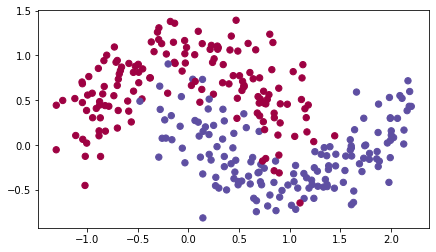

In [7]:
train_X, train_Y = load_dataset()

We will implement a 3 layer NN and train it with the three aforementioned optimization algorithms and see their performance

In [10]:
def model(X, Y, layers_dims, optimizer, learning_rate = 0.0007, mini_batch_size = 64, beta = 0.9, 
          beta1 = 0.9, beta2 = 0.999, epsilon = 1e-8, num_epochs = 10000, print_cost = True):
  
  L = len(layers_dims)
  costs = []
  t = 0
  seed = 10

  params = initialize_parameters(layers_dims)

  if optimizer == 'gd':
    pass
  elif optimizer == 'momentum':
    v = initialize_velocity(params)
  elif optimizer == 'adam':
    v, s = initialize_adam(params)
  
  for i in range(num_epochs):
    seed = seed + 1
    minibatches = random_mini_batches(X, Y, mini_batch_size, seed)

    for minibatch in minibatches:
      (minibatch_X, minibatch_Y) = minibatch

      a3, caches = forward_propagation(minibatch_X, params)

      cost = compute_cost(a3, minibatch_Y)

      grads = backward_propagation(minibatch_X, minibatch_Y, caches)

      if optimizer == 'gd':
        params = update_parameters_with_gd(params, grads, learning_rate)
      elif optimizer == 'momentum':
        params, v = update_parameters_with_momentum(params, grads, v, beta, learning_rate)
      elif optimizer == 'adam':
        t = t + 1
        params, v, s = update_parameters_with_adam(params, grads, v, s, t, learning_rate, beta1, beta2, epsilon)
    

    if print_cost and i % 1000 == 0:
      print(f"Cost after {i} epoch is {cost}")
    if i % 100 == 0:
      costs.append(cost)

  plt.plot(costs)
  plt.ylabel('cost')
  plt.xlabel('epochs per 100')
  plt.title(f'Learning rate is {learning_rate}')
  plt.show()

  return params

Let's run the models and see their results

Starting off with basic mini batch GD

Cost after 0 epoch is 0.690735512291113
Cost after 1000 epoch is 0.6852725328458241
Cost after 2000 epoch is 0.6470722240719002
Cost after 3000 epoch is 0.6195245549970402
Cost after 4000 epoch is 0.5765844355950943
Cost after 5000 epoch is 0.6072426395968575
Cost after 6000 epoch is 0.5294033317684576
Cost after 7000 epoch is 0.46076823985930115
Cost after 8000 epoch is 0.465586082399045
Cost after 9000 epoch is 0.4645179722167684


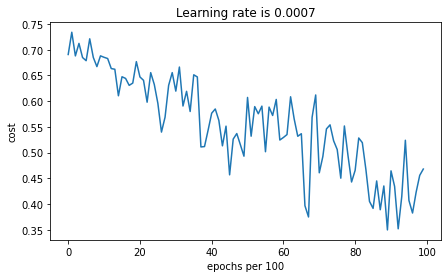

<ipython-input-1-165338d04ccc>:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  p = np.zeros((1,m), dtype = np.int)


Accuracy: 0.7966666666666666


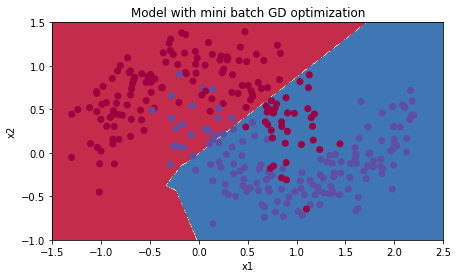

In [13]:
layers_dims = [train_X.shape[0], 5, 2, 1]
params = model(train_X, train_Y, layers_dims, optimizer = 'gd')

predictions = predict(train_X, train_Y, params)

plt.title('Model with mini batch GD optimization')
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x : predict_dec(params, x.T), train_X, train_Y)


The benefits of using momentum here will be small since the dataset isn't large. However, for bigger datasets the gains would be more obvious.

# Momentum

Cost after 0 epoch is 0.6907412988351506
Cost after 1000 epoch is 0.6853405261267578
Cost after 2000 epoch is 0.6471448370095255
Cost after 3000 epoch is 0.6195943032076022
Cost after 4000 epoch is 0.5766650344073023
Cost after 5000 epoch is 0.607323821900647
Cost after 6000 epoch is 0.5294761758786997
Cost after 7000 epoch is 0.46093619004872366
Cost after 8000 epoch is 0.465780093701272
Cost after 9000 epoch is 0.4647395967922748


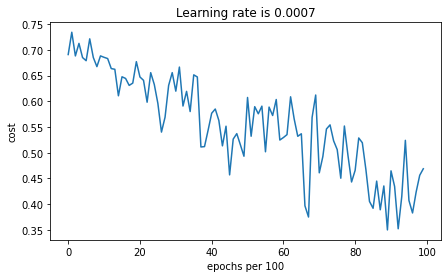

Accuracy: 0.7966666666666666


<ipython-input-1-165338d04ccc>:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  p = np.zeros((1,m), dtype = np.int)


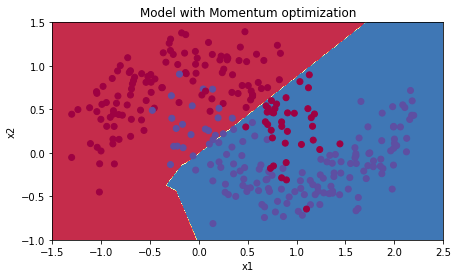

In [14]:
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, beta=0.9, optimizer="momentum")


predictions = predict(train_X, train_Y, parameters)


plt.title("Model with Momentum optimization")
axes = plt.gca()
axes.set_xlim([-1.5, 2.5])
axes.set_ylim([-1, 1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

# Adam

Cost after 0 epoch is 0.44155610904361275
Cost after 1000 epoch is 0.16660290882057782
Cost after 2000 epoch is 0.14881498001103355
Cost after 3000 epoch is 0.07268540040959669
Cost after 4000 epoch is 0.1263818760990297
Cost after 5000 epoch is 0.10521283606125582
Cost after 6000 epoch is 0.11068715245461792
Cost after 7000 epoch is 0.03159758404493288
Cost after 8000 epoch is 0.1131673127930513
Cost after 9000 epoch is 0.19750141416806272


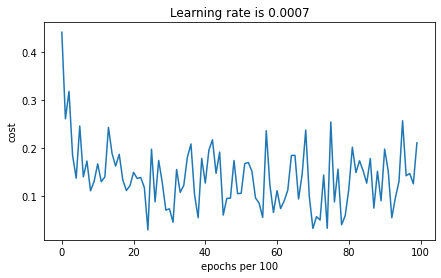

Accuracy: 0.94


<ipython-input-1-165338d04ccc>:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  p = np.zeros((1,m), dtype = np.int)


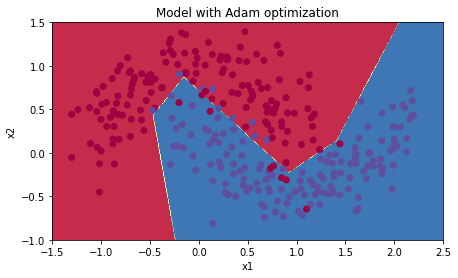

In [17]:
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer="adam")


predictions = predict(train_X, train_Y, parameters)


plt.title("Model with Adam optimization")
axes = plt.gca()
axes.set_xlim([-1.5, 2.5])
axes.set_ylim([-1, 1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)


We see that the Adam optimizer works better than both mini batch GD and momentum. For smaller datasets, the benefit of using momentum is negligeable. Also, the oscillations in the cost function may just come from the fact that some minibatches are more difficult than others.

Adam has a low memory usage and converges faster and better than both GD and momentum. Also, it doesn't require hyperparameter tunig, other that the learning rate